# Project: DATA ANALYSIS OF NO-SHOW AT MEDICAL APPOINTMENT

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

‘ScheduledDay’ tells us on what day the patient set up their appointment. 

‘Neighborhood’ indicates the location of the hospital.

‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.


## columns present in dataset

PatientId, AppointmentID, Gender, ScheduledDay, AppointmentDay, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, No-show


###  Question(s) for Analysis:
 #####   i. Which gender have the highest schedule day
 #####   ii. Which age group has the highest appointment day
 #####   iii. Which Age_group is more expose to diabetes diesease.
 #####   iv. Which age_group showed more on their appointment Day

In [2]:
# importing python packages for my data Analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

### General Properties

Following next is the process of loading and cleaning my dataset



In [3]:
# Loading and reading the dataset
ca_show = pd.read_csv(r'C:\Users\Ezinne\Desktop\UDACITY CODE BASE\project 1\noshowappointments-kagglev2-may-2016 (1).csv')

In [6]:
#checking the first 5 rows of the dataset
ca_show.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
#checking the last 5 rows of the dataset
ca_show.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [4]:
#checking the No. of rows and columns in the dataset
ca_show.shape

(110527, 14)

from the result, I have a total of 110,527 rows and 14 columns

In [9]:
#checking for missing information on the dataset
ca_show.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


the info check clearly shows that there are no missing entries in this dataset because all the features of the dataset has same total number of entries. we also have the dataset types in floats, strings which python describes as objects and integers.

In [10]:
#checking for a summary description of the dataframe
ca_show.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


This result shows the decriptive details of all the numerical variables in the dataset, which covers the following common statistics
###### i the standard deviation of diabetes is 25%
###### ii The average sms received by patients is 32%
###### iii the average age is 37 years
###### iv the maximum age is 115 years from the describe function

In [25]:
# checking for the total sum of duplicates in the dataset
sum(ca_show.duplicated())

0

from the above, there is no duplicated values

In [12]:
#checking for the number of unique values in the dataframe
ca_show.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

explanation: PatientID has total unique value of 62299,appointmentID has 110527,age has 104 unique values,Neighbourhood has 81 unique. 

In [13]:
#checking for the sum of the missing values in the dataframe
ca_show.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

From the foregoing parameters, there are no missing values in this dataframe

### Data Cleaning (its high time, I cleaned our data! So, having gathered and accessed the datasets, its obvious that it needs some fixing. lets do the following)
    i. Convert ScheduleDay and AppointmentDay to Date
    ii. Drop unnecessary columns from the datasets 

### i. converting the ScheduleDay and AppointmentDay to Date

In [14]:
# checking the scheduleDay and appointmentDay, I noticed that it is not properly written in the right format 
# so we need to convert from datetime to date format

ca_show['AppointmentDay'] = pd.to_datetime(ca_show['AppointmentDay']).dt.date


In [15]:
# now lets check to know if appointmentday has been converted using .head()
ca_show.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [16]:
# now lets do the same for our ScheduledDay i.e i want to convert to date

ca_show['ScheduledDay'] = pd.to_datetime(ca_show['ScheduledDay']).dt.date

In [17]:
# now lets check to confirm if ScheduledDay has been converted using .head()
ca_show.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Perfect! I have successfully converted both scheduledDay and appointmentDay to date

### ii. Dropping unnecessary columns from the dataset

In [18]:
# To drop columns not needed in the dataset, we need to use the drop function
ca_show.drop(['PatientId','AppointmentID','Neighbourhood'], axis = 1,inplace = True)

ca_show.head()

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,0,1,1,0,0,0,No


In [19]:
# lets check the structure of the datasets 
ca_show.shape

(110527, 11)

From this result, I now have a total of 110,527 rows and 11 columns because we have dropped 3 columns

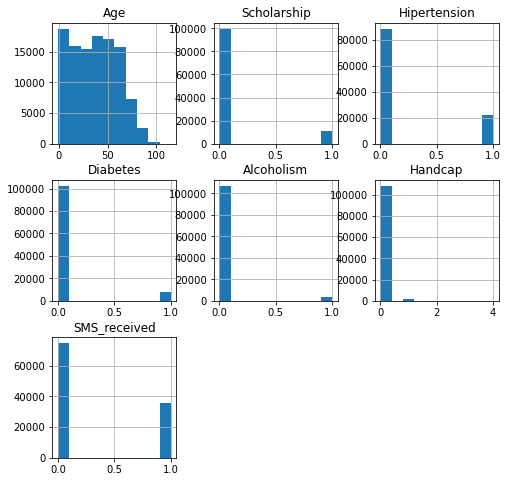

In [52]:
#lets do a quick exploring of the data with visuals
ca_show.hist(figsize =(8, 8));

the above plot shows that alot is happening in the age group. here we can see that the age graph is right skewed.

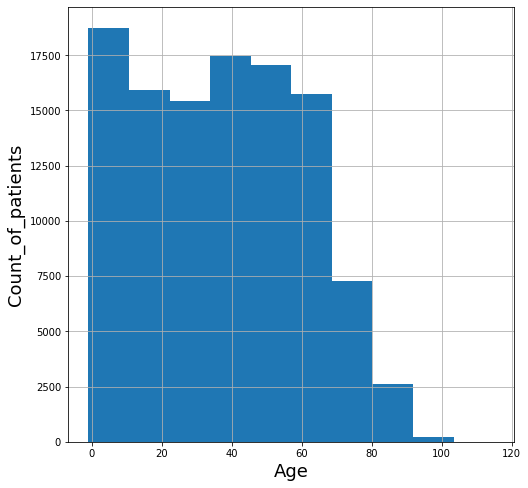

In [5]:
# checking the distribution for Age
ca_show['Age'].hist(figsize = (8,8))
plt.xlabel('Age',fontsize =18)
plt.ylabel('Count_of_patients',fontsize=18);

This graph showed that age is left skewed

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Which gender have the highest Scheduled Day and showed up more?)

In [21]:
# to answer the above question, we will now use the groupby function and count dates for each gender
ca_show.groupby('Gender')['ScheduledDay'].count()

Gender
F    71840
M    38687
Name: ScheduledDay, dtype: int64

This shows that more number of females were scheduled for an appointment than their male counterparts with a sum of 71,840 counts.

In [22]:
# lets define a function to calculate the sum for both Genders with Scheduled Day
def sum_gender(f,m):
    z = f+m
    return z
print(sum_gender(71840,38687))

110527


Here goes a total count of 110,527 patients scheduled for an appointment on the scheduled day

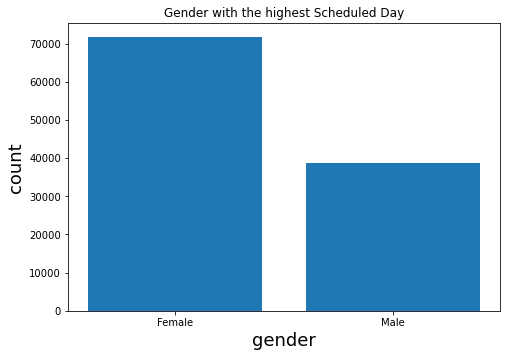

In [51]:
# ploting
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Gender = ['Female', 'Male']
ScheduledDay = [71840,38687,]
ax.bar(Gender,ScheduledDay)
ax.set_title('Gender with the highest Scheduled Day')
plt.xlabel('gender', fontsize = 18)
plt.ylabel('count', fontsize = 18)
plt.show();

Here, we can see that there are more female than male who scheduled and showed up for the appointment.

In [37]:
# NO == means showed up
# YES == means didn't show up
# lets query NO,because that is for those that showed up.

ca_showup = ca_show[ca_show['No-show'] == 'No']

# view datasets
ca_showup

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,age_groups
0,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,No,older_adults
1,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,No,older_adults
2,F,2016-04-29,2016-04-29,62,0,0,0,0,0,0,No,older_adults
3,F,2016-04-29,2016-04-29,8,0,0,0,0,0,0,No,teenagers
4,F,2016-04-29,2016-04-29,56,0,1,1,0,0,0,No,older_adults
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03,2016-06-07,56,0,0,0,0,0,1,No,older_adults
110523,F,2016-05-03,2016-06-07,51,0,0,0,0,0,1,No,adults
110524,F,2016-04-27,2016-06-07,21,0,0,0,0,0,1,No,youths
110525,F,2016-04-27,2016-06-07,38,0,0,0,0,0,1,No,adults


In [43]:
# secondly lets look at which gender showed up more on the appointment date by also using the groupby function and count dates for each gender
ca_showup.groupby('Gender')['No-show'].count()

Gender
F    57246
M    30962
Name: No-show, dtype: int64

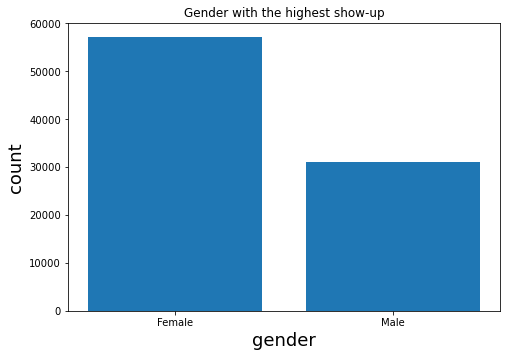

In [50]:
# ploting
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Gender = ['Female', 'Male']
No_show = [57246,30962]
ax.bar(Gender,No_show)
ax.set_title('Gender with the highest show-up')
plt.xlabel('gender', fontsize = 18)
plt.ylabel('count', fontsize = 18)
plt.show();

from the above, the female gender scheduled more appointments and also showed up more than the men.

### Research Question 2  (Which age group has the highest appointment day?)

In [24]:
#View the min, 25%, 50%, 75%, max pH values with Pandas describe
ca_show['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [25]:
# lets use Bin edges to "cut" the data into groups
# Fill in this list with the five values found above
bin_edges = [-1.000000,18.000000,37.000000,55.000000,115.000000 ]

In [26]:
# lets do some labelling, Labels for the four age-group groups
# Name each age-group category
bin_names = [ 'teenagers','youths','adults','older_adults' ]

In [27]:
# lets creates a new collumn called age_groups
ca_show['age_groups'] = pd.cut(ca_show['Age'], bin_edges, labels=bin_names)

# lets check for a successful creation of this column
ca_show.head()

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,age_groups
0,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,No,older_adults
1,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,No,older_adults
2,F,2016-04-29,2016-04-29,62,0,0,0,0,0,0,No,older_adults
3,F,2016-04-29,2016-04-29,8,0,0,0,0,0,0,No,teenagers
4,F,2016-04-29,2016-04-29,56,0,1,1,0,0,0,No,older_adults


In [28]:
# using the groupby function to categorize age-groups and count the appointmentDay
ca_age = ca_show.groupby('age_groups')['AppointmentDay'].count()

ca_age

age_groups
teenagers       28866
youths          27250
adults          26906
older_adults    27504
Name: AppointmentDay, dtype: int64

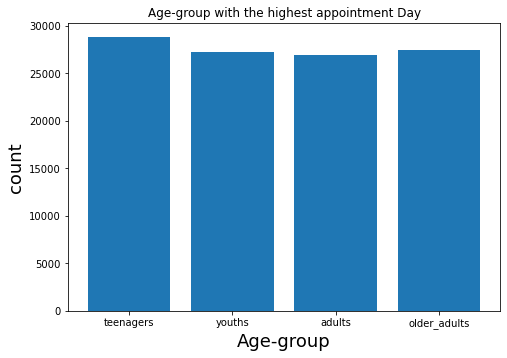

In [53]:
# ploting
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
age_groups = ['teenagers', 'youths', 'adults', 'older_adults']
AppointmentDay = [28866,27250,26906,27504]
ax.bar(age_groups,AppointmentDay)
ax.set_title('Age-group with the highest appointment Day')
plt.xlabel('Age-group', fontsize = 18)
plt.ylabel('count', fontsize = 18)
plt.show()

The above result shows that the age-group: teenagers have the highest appointment day than other age groups.

### Research Question 3  (Which Age_group is more expose to diabetes disease?)

In [30]:
# this research question can be broken down to age_group with highest diabetes
# from the datasets we have Two unique value in diabetes column which is in binary of 0 and 1:
     # those with diabetes == 1
     # those without diabetes == 0
# but we need those with diabetes, so we need to query 1 only

ca_dia= ca_show.query('Diabetes == 1')

ca_dia

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,age_groups
4,F,2016-04-29,2016-04-29,56,0,1,1,0,0,0,No,older_adults
36,F,2016-04-29,2016-04-29,63,0,1,1,0,0,0,No,older_adults
37,F,2016-04-29,2016-04-29,64,1,1,1,0,0,0,No,older_adults
41,F,2016-04-28,2016-04-29,71,0,0,1,0,0,0,No,older_adults
44,F,2016-04-28,2016-04-29,78,0,1,1,0,0,0,Yes,older_adults
...,...,...,...,...,...,...,...,...,...,...,...,...
110448,F,2016-06-01,2016-06-06,40,0,1,1,0,0,1,No,adults
110456,F,2016-06-03,2016-06-03,79,0,1,1,0,0,0,No,older_adults
110468,F,2016-06-02,2016-06-07,76,0,1,1,0,0,1,No,older_adults
110477,F,2016-05-09,2016-06-06,67,0,0,1,0,0,1,No,older_adults


In [31]:
# now lets use the groupby function to know the age group exposed to diabetes
ca_dia.groupby('age_groups')['Diabetes'].count()

age_groups
teenagers         51
youths           332
adults          2017
older_adults    5543
Name: Diabetes, dtype: int64

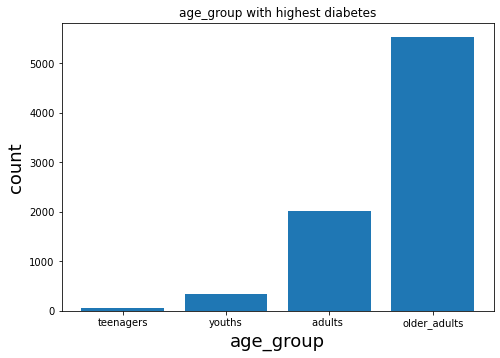

In [54]:
# ploting
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
age_groups = ['teenagers', 'youths', 'adults ', 'older_adults']
diabetes_count = [51,332,2017,5543]
ax.bar(age_groups,diabetes_count)
ax.set_title('age_group with highest diabetes')
plt.xlabel('age_group', fontsize = 18)
plt.ylabel('count', fontsize = 18)
plt.show()

As we can see now, the older adults are more exposed to diabetes with a total count of 5,543. this is way above their counterparts.

#### Research Question 4: Which age_group showed more on their appointment Day

In [33]:
# NO == means showed up
# YES == means didn't show up
# lets query NO,because that is for those that showed up.

ca_showup = ca_show[ca_show['No-show'] == 'No']

# view datasets
ca_showup

,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,age_groups
0,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,No,older_adults
1,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,No,older_adults
2,F,2016-04-29,2016-04-29,62,0,0,0,0,0,0,No,older_adults
3,F,2016-04-29,2016-04-29,8,0,0,0,0,0,0,No,teenagers
4,F,2016-04-29,2016-04-29,56,0,1,1,0,0,0,No,older_adults
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03,2016-06-07,56,0,0,0,0,0,1,No,older_adults
110523,F,2016-05-03,2016-06-07,51,0,0,0,0,0,1,No,adults
110524,F,2016-04-27,2016-06-07,21,0,0,0,0,0,1,No,youths
110525,F,2016-04-27,2016-06-07,38,0,0,0,0,0,1,No,adults


In [34]:
# now lets use group function to for the age_group.
ca_showup.groupby('age_groups')['No-show'].count()

age_groups
teenagers       22519
youths          20836
adults          21651
older_adults    23201
Name: No-show, dtype: int64

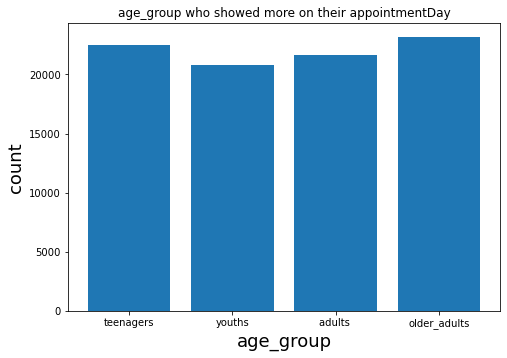

In [55]:
# ploting
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
age_groups = ['teenagers', 'youths', 'adults ', 'older_adults']
Noshow_count = [22519,20836,21651,23201]
ax.bar(age_groups,Noshow_count)
ax.set_title('age_group who showed more on their appointmentDay')
plt.xlabel('age_group', fontsize = 18)
plt.ylabel('count', fontsize = 18)
plt.show()

older_adults happened to show up more on their Appointment day at the hospital with a count total of 23,201

<a id='conclusions'></a>
## Conclusions

###### 1.There is not big difference between the distribution of age between patients who showed up for the appointment versus the patients that did not show up for the appointment.
###### 2. There is a higher percentage of people that received an sms and did not show up when compared to people who received an SMS and did show up.
###### 3.People that have a disease are 3% more likely to show up for the appointment than people who do not have a disease.
###### 4.Handicap patients specifically, however are more likely to show up to the appointment compared to people who are not Handicap.
###### 5.Being enrolled in the scholarship program does not seem to make people more likely to show up to the appointment.

#  References used for the success of this Project
  ##### https://www.geeksforgeeks.org/how-to-convert-datetime-to-date-in-pandas/
  ##### https://pandas.pydata.org/docs/
  ###### https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm

### LIMITATIONS:


###### 1.Most of our variables are categorical which does not allow for a high level of statistical method that can be used to provide correlations e.t.c
###### 2.The statistics used here are descriptive statistics, not inferential, meaning that we did not create any hypothesis or controlled experiments or inferences with our data.
###### 3.We do not have a lot of details for certain factors to draw conclusion for the SMS_received example, the data shows that no-showers are more likely to receive an SMS.This may seem counter intuitive, but we do not have information on the conditions of when the SMS is sent . For example they may target NO-shower with SMS, or they may send the SMS once the Patient has not checked in 30 minutes prior to their appointment e.t.c
###### 4.Cannot show strong correlations between factors since most of our data is categorical.
